<a href="https://colab.research.google.com/github/aayushi-29/VCET-DS/blob/main/SampleD_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ML-CLASSIFICATION***

In [ ]:
#1. logistic Regression

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder to handle string columns
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

logr=LogisticRegression()

df=pd.read_csv("tested.csv")

x = df.drop('PassengerId', axis=1)
x = x.drop('Embarked', axis=1)
y = df['Embarked']

# Identify columns with string values (object dtype)
object_cols = x.select_dtypes(include=['object']).columns

# Apply Label Encoding to string columns
label_encoder = LabelEncoder()
for col in object_cols:
    x[col] = label_encoder.fit_transform(x[col])

# Impute missing values using SimpleImputer (replace NaN with most frequent value)
imputer = SimpleImputer(strategy='most_frequent')
x = imputer.fit_transform(x) # Fit and transform to impute missing values

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7380952380952381
              precision    recall  f1-score   support

           C       0.86      0.26      0.40        23
           Q       0.00      0.00      0.00        15
           S       0.73      0.99      0.84        88

    accuracy                           0.74       126
   macro avg       0.53      0.42      0.41       126
weighted avg       0.67      0.74      0.66       126

[[ 6  0 17]
 [ 0  0 15]
 [ 1  0 87]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
#2. Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score

nb=GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.4)

nb.fit(X_train,y_train)

y_pred1=nb.predict(X_test)

print("Naive Bayes: ",accuracy_score(y_test,y_pred1))

Naive Bayes:  0.49404761904761907


In [ ]:
# 3. KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5)

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

train=knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print('KNN:',accuracy_score(y_test,y_pred))

KNN: 0.6857142857142857


In [ ]:
#4. Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt=tree.DecisionTreeClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print('DECISION TREE:',accuracy_score(y_test,y_pred))

DECISION TREE: 0.7777777777777778


In [ ]:
# 5. Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print('RANDOM FOREST:',accuracy_score(y_test,y_pred))

RANDOM FOREST: 0.8253968253968254


In [ ]:
# 6. Gradient Boosting (BEST ALGORITHM)

from sklearn.ensemble import GradientBoostingClassifier

gbm=GradientBoostingClassifier(n_estimators=10)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0,test_size=0.2)

gbm.fit(X_train,Y_train)

y_pred=gbm.predict(X_test)

print("GBM: ",accuracy_score(Y_test,y_pred))

GBM:  0.8690476190476191


# ***DATA ENGINEERING***

In [ ]:
#Import the datset
import pandas as pd
df=pd.read_csv("tested.csv")
print(df.head(5))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
import pandas as pd

df=pd.read_csv("tested.csv")

X = df.drop('PassengerId', axis=1)
X = X.drop('Embarked', axis=1)
Y = df['Embarked']
print(X)
print(Y)

     Survived  Pclass                                          Name     Sex  \
0           0       3                              Kelly, Mr. James    male   
1           1       3              Wilkes, Mrs. James (Ellen Needs)  female   
2           0       2                     Myles, Mr. Thomas Francis    male   
3           0       3                              Wirz, Mr. Albert    male   
4           1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
..        ...     ...                                           ...     ...   
413         0       3                            Spector, Mr. Woolf    male   
414         1       1                  Oliva y Ocana, Dona. Fermina  female   
415         0       3                  Saether, Mr. Simon Sivertsen    male   
416         0       3                           Ware, Mr. Frederick    male   
417         0       3                      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fa

In [ ]:
#Feature Selection 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Initialize the Logistic Regression model
logr = LogisticRegression(max_iter=200)

df = pd.read_csv("tested.csv")
x = df.drop(['PassengerId', 'Embarked'], axis=1)
y = df['Embarked']

x = pd.get_dummies(x)

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

x = pd.DataFrame(x_imputed, columns=x.columns)

le = LabelEncoder()
y = le.fit_transform(y)

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

           Specs      Score
0       Survived   4.446112
1         Pclass  18.087531
2            Age  58.308720
3          SibSp   8.338599
4          Parch  19.210552
..           ...        ...
860  Cabin_F G63   0.548148
861     Cabin_F2   0.548148
862    Cabin_F33   0.548148
863     Cabin_F4   1.096296
864     Cabin_G6   0.548148

[865 rows x 2 columns]


[0.01648166 0.08858222 0.12344222 0.01693159 0.12298786 0.04909684
 0.03841591 0.23998443 0.2284231  0.07565417]


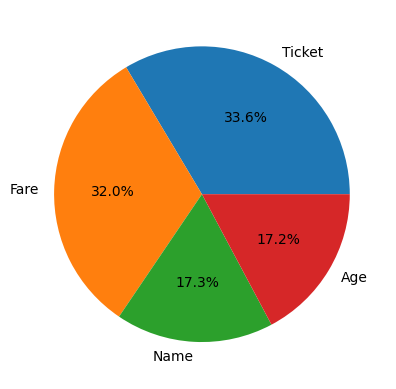

In [ ]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame handling
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical variables

model = ExtraTreesClassifier()

# Assuming X contains categorical features, encode them using LabelEncoder
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform) # Apply LabelEncoder to all columns in X

model.fit(X_encoded,Y) # Fit the model with encoded features
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X_encoded.columns) # Use encoded column names
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
#plot(kind='box')
# plot(kind='area')
# plot(kind='line', marker='o')
plt.show()

In [ ]:
#Numerical to Categorical
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is already defined and loaded with the necessary data

# Check if 'Age' and 'Fare' are already categorical and convert to numeric if needed
if df['Age'].dtype.name == 'category':
    df['Age'] = df['Age'].cat.codes  # Convert categories to numerical codes
if df['Fare'].dtype.name == 'category':
    df['Fare'] = df['Fare'].cat.codes  # Convert categories to numerical codes

# Converting numerical columns to categorical
df['Age'] = pd.cut(df['Age'], 3, labels=['0', '1', '2'])
df['Fare'] = pd.cut(df['Fare'], 3, labels=['0', '1', '2'])

# Ensure 'Survived' and 'Pclass' are treated as categorical
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

print(df)

# Preparing X and Y
X = df.drop(['PassengerId', 'Embarked'], axis=1)
Y = df['Embarked']
print(Y)

# Encoding Y (Embarked)
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

     PassengerId Survived Pclass  \
0            892        0      3   
1            893        1      3   
2            894        0      2   
3            895        0      3   
4            896        1      3   
..           ...      ...    ...   
413         1305        0      3   
414         1306        1      1   
415         1307        0      3   
416         1308        0      3   
417         1309        0      3   

                                             Name     Sex  Age  SibSp  Parch  \
0                                Kelly, Mr. James    male    1      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female    1      1      0   
2                       Myles, Mr. Thomas Francis    male    2      0      0   
3                                Wirz, Mr. Albert    male    1      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female    0      1      1   
..                                            ...     ...  ...    ...    ...   
413    

In [ ]:
#Categorical to Numerical
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

[1 2 1 2 2 2 1 2 0 2 2 2 2 2 2 0 1 0 2 0 0 2 2 0 0 2 0 0 2 0 2 2 2 2 0 0 2
 2 2 2 0 2 2 2 2 2 0 1 0 2 2 0 2 2 0 1 2 2 2 0 2 2 2 1 0 2 1 2 0 2 1 2 2 0
 0 0 2 2 2 1 0 2 2 2 1 0 1 2 1 2 2 2 2 2 0 2 2 2 2 2 0 2 1 2 0 2 1 1 2 2 0
 1 0 1 2 0 0 2 0 2 2 1 0 2 1 2 2 1 2 2 2 0 2 0 2 2 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 1 0 2 2 2 2 0 2 0 2 2 0 2 0 2 2 2 0 2 0 2 0 2 1 0
 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 1 2 0 2 2 0 1 2 0 2 2 2 2 2 2 2 1 2 0 2 0 2
 2 2 0 0 2 1 2 2 2 2 2 1 0 2 0 0 2 0 0 2 0 2 2 2 2 2 2 0 2 2 0 2 2 2 1 2 2
 2 2 2 2 2 0 2 2 2 2 2 0 1 0 1 0 2 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 1 0 2 2 2
 0 0 2 2 2 0 2 2 1 2 2 2 2 2 2 0 2 1 0 1 0 2 2 2 2 0 2 2 2 2 2 0 2 2 2 0 0
 0 2 2 2 0 2 0 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 0 2 0 0
 2 0 2 2 2 0 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 0 2 1 2 2 0 2 0 0 2
 0 1 2 1 1 2 2 0 2 2 0]


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#Dealing with missing values

df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.head())

   PassengerId Survived Pclass                                          Name  \
0          892        0      3                              Kelly, Mr. James   
1          893        1      3              Wilkes, Mrs. James (Ellen Needs)   
2          894        0      2                     Myles, Mr. Thomas Francis   
3          895        0      3                              Wirz, Mr. Albert   
4          896        1      3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

      Sex Age  SibSp  Parch   Ticket Fare Cabin Embarked  
0    male   1      0      0   330911    0   NaN        Q  
1  female   1      1      0   363272    0   NaN        S  
2    male   2      0      0   240276    0   NaN        Q  
3    male   1      0      0   315154    0   NaN        S  
4  female   0      1      1  3101298    0   NaN        S  


In [ ]:
import pandas as pd

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Check if 'Item_Weight' is in the DataFrame columns
if 'Item_Weight' in df.columns:
    # Imputing numerical values (choose one method: mean, median, or mode)
    # Method: Mean
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
else:
    print("Column 'Item_Weight' not found in the DataFrame.")

# Similarly, check if 'Outlet_Size' exists before imputing
if 'Outlet_Size' in df.columns:
    # Imputing categorical values with a specific value, e.g., 'Medium'
    df['Outlet_Size'].fillna('Medium', inplace=True)
else:
    print("Column 'Outlet_Size' not found in the DataFrame.")

# Print the count of missing values after imputation
print("Missing values count after imputation:")
print(df.isnull().sum())

Missing values count before imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
Column 'Item_Weight' not found in the DataFrame.
Column 'Outlet_Size' not found in the DataFrame.
Missing values count after imputation:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#SMOTE

import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Assuming X and Y are already defined

# Print the initial class distribution
print("Initial class distribution:", Counter(Y))

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=np.number).columns

# Handle missing values for numeric columns only
imputer = SimpleImputer(strategy='mean')
X_numeric = X.select_dtypes(include=np.number)
X_numeric = imputer.fit_transform(X_numeric)

# Handle missing values in non-numeric columns (using most frequent value)
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_non_numeric = X.select_dtypes(exclude=np.number)
X_non_numeric = imputer_categorical.fit_transform(X_non_numeric)

# Convert non-numeric columns to numerical using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Create OneHotEncoder instance
X_non_numeric_encoded = encoder.fit_transform(X_non_numeric) # Fit and transform non-numeric data

# Combine imputed numeric and encoded non-numeric data back into X
X = np.concatenate([X_numeric, X_non_numeric_encoded], axis=1) # Use np.concatenate for numerical arrays

# Random OverSampling
ros = RandomOverSampler(random_state=0)
X_ros, Y_ros = ros.fit_resample(X, Y)
print("After Random OverSampling:", Counter(Y_ros))

# Synthetic Minority Oversampling (SMOTE)
smote = SMOTE(random_state=0)
X_smote, Y_smote = smote.fit_resample(X_ros, Y_ros) # Now X_ros contains only numerical data
print("After SMOTE:", Counter(Y_smote))

# Random UnderSampling
rus = RandomUnderSampler(random_state=0)
X_rus, Y_rus = rus.fit_resample(X_smote, Y_smote)
print("After Random UnderSampling:", Counter(Y_rus))

Initial class distribution: Counter({2: 270, 0: 102, 1: 46})
After Random OverSampling: Counter({1: 270, 2: 270, 0: 270})
After SMOTE: Counter({1: 270, 2: 270, 0: 270})
After Random UnderSampling: Counter({0: 270, 1: 270, 2: 270})


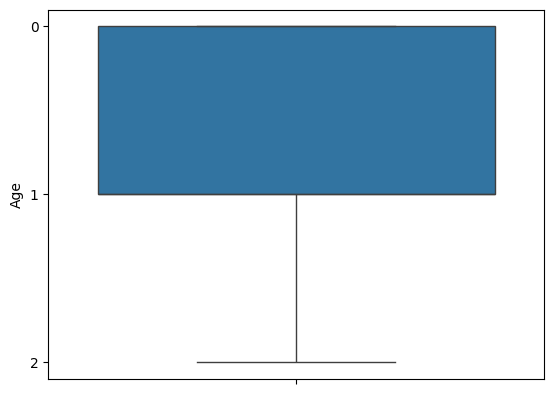

In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Age'])
plt.show()

In [ ]:
import pandas as pd

# Convert 'Fare' column to numeric, coercing errors to NaN
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Drop rows with NaN values in 'Fare' for accurate quantile calculation
df.dropna(subset=['Fare'], inplace=True)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

# Replace outliers with the upper and lower bounds
df['Fare'] = df['Fare'].clip(lower=lower, upper=upper)

print(df['Fare'])

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Fare, Length: 418, dtype: int64


In [ ]:
#Principal Component Analysis(PCA)

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for categorical target

logr=LogisticRegression()
pca=PCA(n_components=2)

# Drop irrelevant columns (adjust as needed)
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle non-numeric features
# 1. Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=np.number).columns

# 2. Convert non-numeric columns to numerical using LabelEncoder
for col in non_numeric_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

Y = df['Embarked']

# Encode the target variable 'Embarked'
le = LabelEncoder()
Y = le.fit_transform(Y)

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

[[-3.24847781e-01 -5.73704588e-01]
 [ 4.30127470e-01 -5.90747700e-03]
 [-1.15789424e+00 -8.52050459e-02]
 [-7.68962335e-02 -6.23956821e-01]
 [ 1.60904958e+00  1.84726202e-01]
 [ 7.36997541e-01 -1.14518416e+00]
 [-1.81414322e-01 -4.07505285e-01]
 [ 6.32569656e-01  5.07026441e-01]
 [ 3.84527904e-01 -8.78480389e-01]
 [ 1.46417803e+00 -2.41484077e-01]
 [-1.70468378e+00  4.18497852e-01]
 [-1.15201612e-01 -6.89412408e-01]
 [ 1.20571587e+00 -5.92590401e-01]
 [-5.46352452e-01  3.16392762e-01]
 [ 3.91822092e-01 -7.13630647e-02]
 [ 7.28965460e-01 -4.59358143e-01]
 [-3.44000470e-01 -6.06432382e-01]
 [ 2.41094446e-01 -1.04467969e+00]
 [ 4.30127470e-01 -5.90747700e-03]
 [-4.29365870e-01 -3.57253053e-01]
 [-1.06140824e+00  3.84169433e-01]
 [ 1.10202587e+00 -4.33323142e-01]
 [-1.59955570e+00  5.19241568e-01]
 [ 5.67817401e-01 -3.98274265e-01]
 [ 9.91003998e-01  2.16472445e+00]
 [ 2.86694012e-01 -1.72106781e-01]
 [ 7.11250860e-01 -2.32074961e-01]
 [ 2.41094446e-01 -1.04467969e+00]
 [-1.15201612e-01 -6

# ***VISUALIZATION***

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("tested.csv")

X = df.drop('PassengerId', axis=1)
X = X.drop('Embarked', axis=1)
Y = df['Embarked']
print(X)
print(Y)


     Survived  Pclass                                          Name     Sex  \
0           0       3                              Kelly, Mr. James    male   
1           1       3              Wilkes, Mrs. James (Ellen Needs)  female   
2           0       2                     Myles, Mr. Thomas Francis    male   
3           0       3                              Wirz, Mr. Albert    male   
4           1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
..        ...     ...                                           ...     ...   
413         0       3                            Spector, Mr. Woolf    male   
414         1       1                  Oliva y Ocana, Dona. Fermina  female   
415         0       3                  Saether, Mr. Simon Sivertsen    male   
416         0       3                           Ware, Mr. Frederick    male   
417         0       3                      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fa

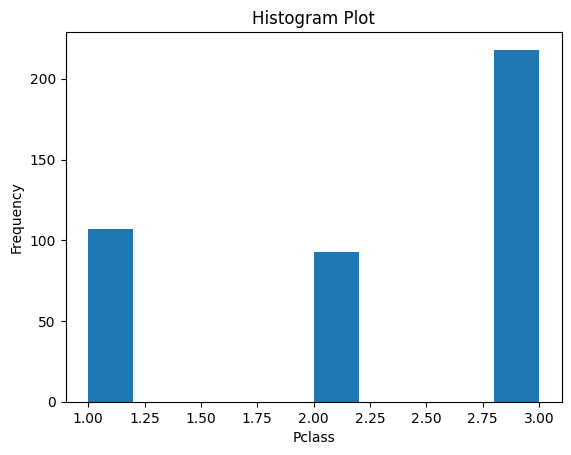

In [ ]:
# Histogram shows the distribution of a continuous variable
plt.hist(df["Pclass"])
plt.title("Histogram Plot")
plt.xlabel("Pclass")
plt.ylabel("Frequency")
plt.show()

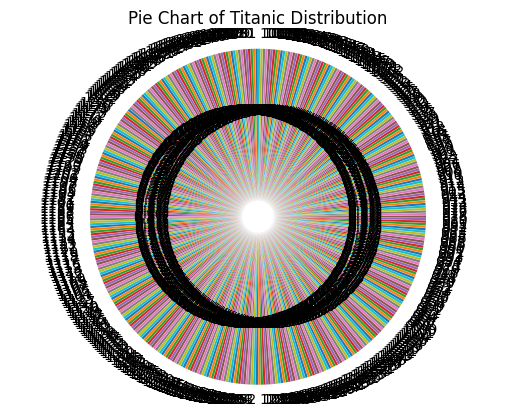

In [ ]:
#Pie Chart to show the distribution of Bankrupt?
bankrupt_counts = df['PassengerId'].value_counts()
bankrupt_labels = bankrupt_counts.index
sizes = bankrupt_counts.values

plt.pie(sizes, labels=bankrupt_labels, autopct='%1.1f%%', startangle=140, explode=[0.1] * len(sizes))
plt.title("Pie Chart of Titanic Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

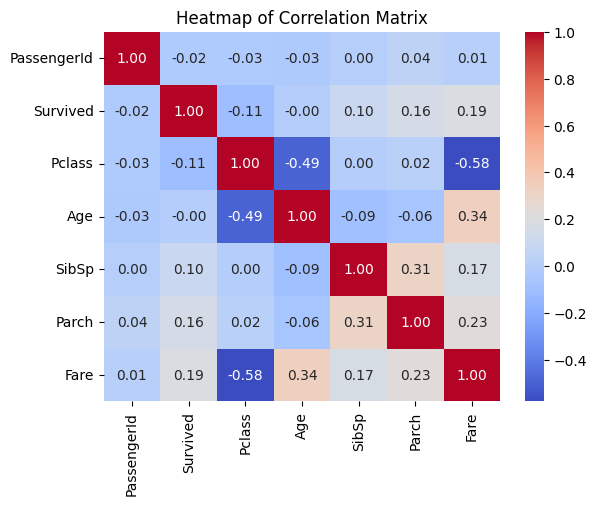

In [ ]:
# Calculate correlation matrix only for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()  # Calculate correlations for numerical columns only
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlation Matrix")
plt.show()